# Naive Bayes

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [4]:
Y = dataset.iloc[:, 4]
Y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
      ..
370    1
371    1
372    0
373    1
374    0
375    1
376    0
377    0
378    1
379    1
380    0
381    1
382    1
383    1
384    1
385    1
386    1
387    0
388    1
389    1
390    1
391    1
392    1
393    1
394    0
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# Splitting the dataset into Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train, X_test, Y_train, Y_test

(array([[    44,  39000],
        [    32, 120000],
        [    38,  50000],
        [    32, 135000],
        [    52,  21000],
        [    53, 104000],
        [    39,  42000],
        [    38,  61000],
        [    36,  50000],
        [    36,  63000],
        [    35,  25000],
        [    35,  50000],
        [    42,  73000],
        [    47,  49000],
        [    59,  29000],
        [    49,  65000],
        [    45, 131000],
        [    31,  89000],
        [    46,  82000],
        [    47,  51000],
        [    26,  15000],
        [    60, 102000],
        [    38, 112000],
        [    40, 107000],
        [    42,  53000],
        [    35,  59000],
        [    48,  41000],
        [    48, 134000],
        [    38, 113000],
        [    29, 148000],
        [    26,  15000],
        [    60,  42000],
        [    24,  19000],
        [    42, 149000],
        [    46,  96000],
        [    28,  59000],
        [    39,  96000],
        [    28,  89000],
        [   

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train).astype(float)
X_test = sc_X.transform(X_test).astype(float)
X_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

# Fitting Kernel SVM to the Training Set

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Predicting the Test set results

In [9]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[65,  3],
       [ 7, 25]])

# Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


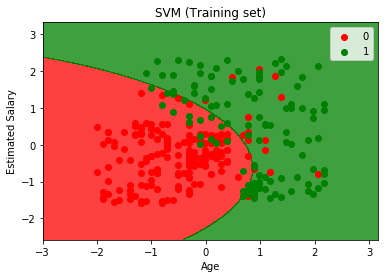

In [11]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


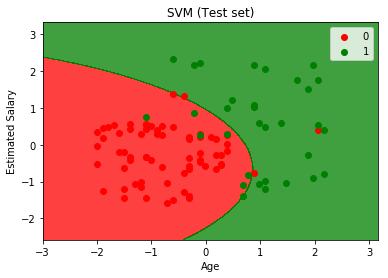

In [12]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()